# Using Multiscale PHATE to visualize and characterize PBMCs

## 0. Introduction

In this tutorial we will demonstrate how to use Multiscale PHATE to characterize different PBMC subsets across multiple granularities.  We will use a dataset generated by 10X from human blood for our tutorial.  We will introduce some functionalities of Multiscale PHATE, including constructing a Diffusion Condensation tree, identifying salient levels of resolution in this tree, visualizing a dataset across resolutions and zooming in to clusters of interest. We will also introduce some basics in data loading and preprocessing.

## 1. Installing and Loading packages

If you haven't already installed Multiscale PHATE, you can do so from this notebook. We will also install scprep, which is a useful package for loading and pre-processing single cell data.

In [1]:
!pip install git+https://github.com/KrishnaswamyLab/Multiscale_PHATE

  Cloning https://github.com/KrishnaswamyLab/Multiscale_PHATE to /tmp/pip-req-build-or50dt_c
  Running command git clone -q https://github.com/KrishnaswamyLab/Multiscale_PHATE /tmp/pip-req-build-or50dt_c
  Resolved https://github.com/KrishnaswamyLab/Multiscale_PHATE to commit 88a3e434469eac081c7b5ae54de7050b1e42c15f
  Preparing metadata (setup.py) ... done
  Created wheel for multiscale-phate: filename=multiscale_phate-0.0-py3-none-any.whl size=28287 sha256=c793a52589619c34cedfc64799e6a9f68f5f774ccf501333d0551b697972c823
  Stored in directory: /tmp/pip-ephem-wheel-cache-o4tzy3fz/wheels/80/ad/36/36891610b69fb4c660953eddd0baf7129a1de8b8a7dcf140df
Successfully built multiscale-phate


In [2]:
!pip install scprep

In [3]:
import multiscale_phate as mp
import numpy as np
import pandas as pd

import scprep
import os

## 2. Loading and filter data

In this section, we will download 10X data from human PBMCs to your local computer and pre-process it for multiresolution analysis.

In [4]:
## Save data directory
data_dir = os.path.expanduser("~/multiscale_phate_data") # enter path to data directory here (this is where you want to save 10X data)
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)

file_name = '10X_pbmc_data.h5'
file_path = os.path.join(data_dir, file_name)

In [5]:
URL = 'https://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc4k/pbmc4k_raw_gene_bc_matrices_h5.h5'

scprep.io.download.download_url(URL, file_path)

In [6]:
data = scprep.io.load_10X_HDF5(file_path, gene_labels='both')

data.head()

,RP11-34P13.3 (ENSG00000243485),FAM138A (ENSG00000237613),OR4F5 (ENSG00000186092),RP11-34P13.7 (ENSG00000238009),RP11-34P13.8 (ENSG00000239945),RP11-34P13.14 (ENSG00000239906),RP11-34P13.9 (ENSG00000241599),FO538757.3 (ENSG00000279928),FO538757.2 (ENSG00000279457),AP006222.2 (ENSG00000228463),...,AC007325.2 (ENSG00000277196),BX072566.1 (ENSG00000277630),AL354822.1 (ENSG00000278384),AC023491.2 (ENSG00000278633),AC004556.1 (ENSG00000276345),AC233755.2 (ENSG00000277856),AC233755.1 (ENSG00000275063),AC240274.1 (ENSG00000271254),AC213203.1 (ENSG00000277475),FAM231B (ENSG00000268674)
AAACCTGAGAAACCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAAACCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAAACCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAAACGAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAAACGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that we have loaded the data, we will remove cells with low transcript counts and unexpressed genes:

In [7]:
data = scprep.filter.filter_library_size(data, cutoff=1000,  keep_cells='above')
data = scprep.filter.filter_rare_genes(data)

Finally, we will library size normalize and square root transform the expression data.

In [8]:
data_norm, libsize = scprep.normalize.library_size_normalize(data, return_library_size=True)

In [9]:
data_sqrt = np.sqrt(data_norm)

data_sqrt.head()

,RP11-34P13.7 (ENSG00000238009),FO538757.2 (ENSG00000279457),AP006222.2 (ENSG00000228463),RP4-669L17.10 (ENSG00000237094),RP11-206L10.9 (ENSG00000237491),LINC00115 (ENSG00000225880),FAM41C (ENSG00000230368),NOC2L (ENSG00000188976),KLHL17 (ENSG00000187961),PLEKHN1 (ENSG00000187583),...,MT-ND6 (ENSG00000198695),MT-CYB (ENSG00000198727),BX004987.4 (ENSG00000278704),AC145212.2 (ENSG00000274847),AC011043.1 (ENSG00000276256),AL592183.1 (ENSG00000273748),AC007325.4 (ENSG00000278817),AL354822.1 (ENSG00000278384),AC004556.1 (ENSG00000276345),AC240274.1 (ENSG00000271254)
AAACCTGAGAAGGCCT-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,4.154662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGACAGACC-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,6.573422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGATAGTCA-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,6.449217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGCGCCTCA-1,0.0,0.0,0.0,0.0,2.077481,0.0,0.0,2.077481,0.0,0.0,...,0.0,5.876003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGCATGGT-1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,3.661874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Creating multi-resolution embeddings and clusters with Multiscale PHATE

Computing Multiscale PHATE tree involves two successive steps:

1. Building the Multiscale PHATE operator
2. Fitting your data with the operator to construct a diffusion condensation tree and running gradient analysis to identify stable resolutions for downstream analysis

Here we set the random_state to enhance reproducibility.

In [10]:
mp_op = mp.Multiscale_PHATE(random_state=1)

levels = mp_op.fit(data_sqrt)

Calculating Multiscale PHATE tree...
  Calculating PCA...
  Calculated PCA in 7.32 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 16.37 seconds.
  Setting epsilon to 3.0911
  Setting merge threshold to 0.1405
  Calculating condensation...
  Calculated condensation in 3.05 seconds.
Calculated Multiscale PHATE tree in 26.95 seconds.
Computing gradient...
Identifying salient levels of resolution...


In order to identify salient levels of the diffusion condensation tree, we can visualize the output of our gradient analysis and highlight stable resolutions for downstream analysis:

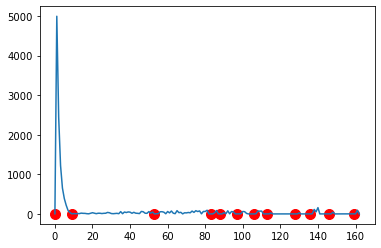

In [11]:
import matplotlib.pyplot as plt
ax = plt.plot(mp_op.gradient)
ax = plt.scatter(levels, mp_op.gradient[levels], c = 'r', s=100)

In [12]:
levels

[0, 9, 53, 83, 88, 97, 106, 113, 128, 136, 146, 159]

## 4. Visualizing full Diffusion Condensation tree

As Diffusion Condensation creates a hierarchy of cells and clusters, it can be useful to visualize this tree and map either iteration or cluster labels onto this tree. We can first build the tree with the build_tree() function:

Calculating base visualization...
Calculated base visualization in 5.42 seconds.
Calculating tree...
Calculated tree in 0.11 seconds.


<Axes3DSubplot:>

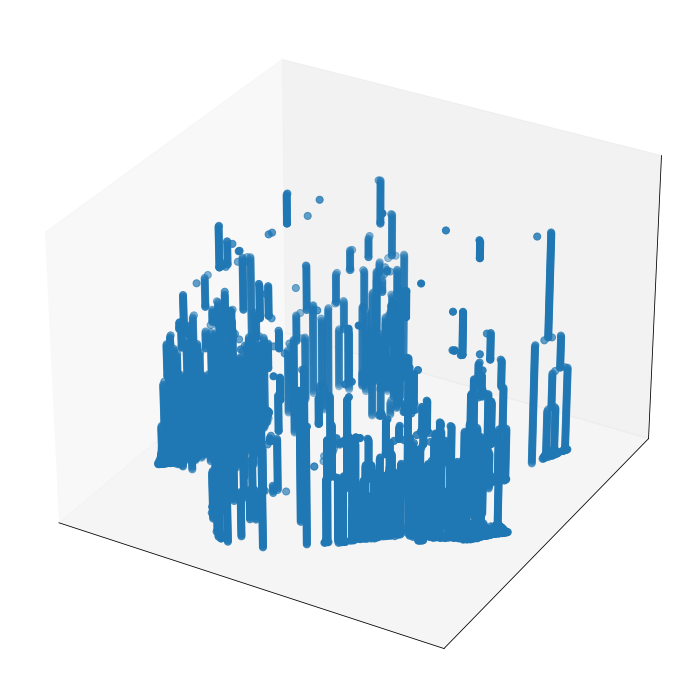

In [13]:
### building tree

tree = mp_op.build_tree()

scprep.plot.scatter3d(tree, s= 50,
                      fontsize=16, ticks=False, figsize=(10,10))

It can also be useful to color the tree with various labels, such as diffusion condensation iteration and by a particular layer of the tree. Since the tree is effectively a series of stacked 2D condensed points, coloring the tree by the third column will color each point by its corresponding iteration:

<Axes3DSubplot:>

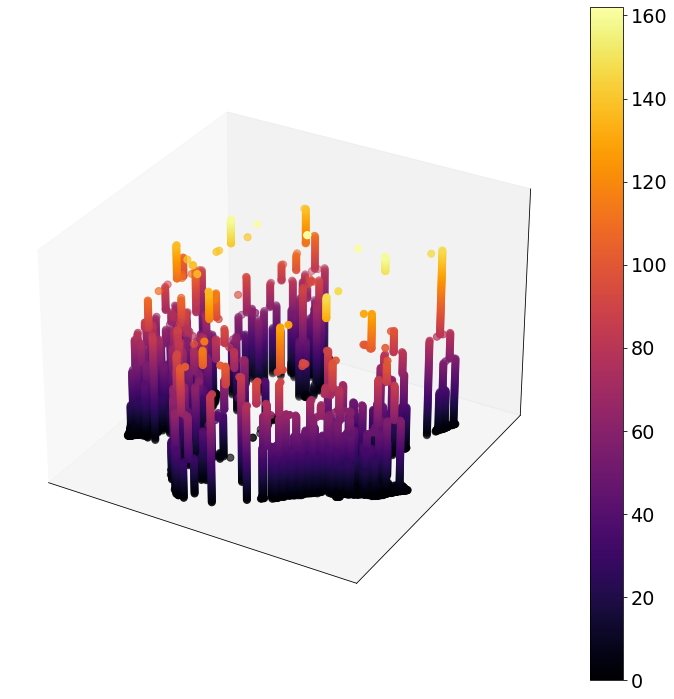

In [14]:
scprep.plot.scatter3d(tree, c = tree[:,2], s= 50,
                      fontsize=16, ticks=False, figsize=(10,10))

In order to color the tree by clusters found at a paticular granularity of the Diffusion Condensation tree, we simply pass a resolution identified by the gradient analysis to the .get_tree_clusters() function and color our tree embedding with the result. Play around with the clustering level you pass to the .get_tree_clusters() function and see what happens:

<Axes3DSubplot:>

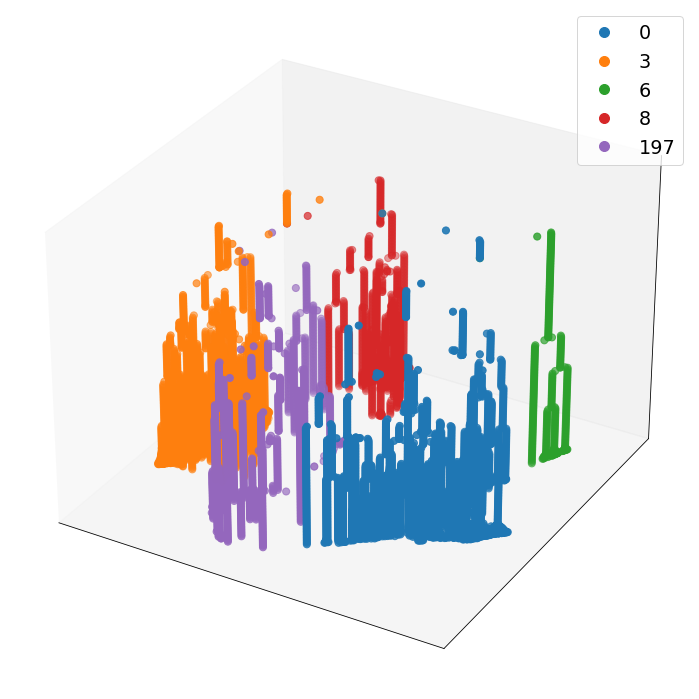

In [15]:
tree_clusters = mp_op.get_tree_clusters(levels[9])

scprep.plot.scatter3d(tree, c = tree_clusters, s= 50,
                      fontsize=16, ticks=False, figsize=(10,10))

## 5. Visualizing Coarse Granularity

Now we are ready to produce an initial coarse embedding of the dataset. When running the .transform() function, we select a coarse resolution for our clusters (level 136 - the 9th salient resolution identified in this example) and a finer resoultion for our embedding (level 53 - the 2nd salient resolution identified in this example). By modifying the ideal resolutions passed to the .transform() function, we can modify the granularity of the visualization and clusters, producing coarser or finer embeddings and groupings of the data. We recommend playing around with these resolutions.

In [16]:
coarse_embedding, coarse_clusters, coarse_sizes = mp_op.transform(visualization_level = levels[2],
                                                                  cluster_level = levels[9])

<AxesSubplot:xlabel='Multiscale PHATE1', ylabel='Multiscale PHATE2'>

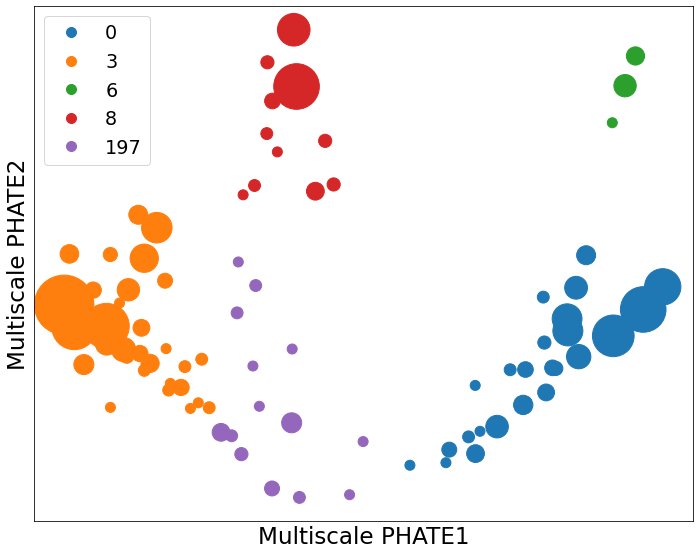

In [17]:
scprep.plot.scatter2d(coarse_embedding, s = 100*np.sqrt(coarse_sizes), c = coarse_clusters,
                      fontsize=16, ticks=False,label_prefix="Multiscale PHATE", figsize=(10,8))


Next, we can identify specific clusters to cell types by mapping and visualizing the expression of key marker genes for T cells (CD3E), B cells (CD19) and Monocytes (CD14) to our coarse embedding. To run this mapping we run the .get_expression() function by passing the full expression vector from single cells as well as the resolution of the visualization

We would like to note that you can perform MELD (Burkhardt et al. 2021) at this resolution as well by running get_expression() on a binarized perturbation signal [0,1] that denotes the perturbation of origin for a given cell.

In [18]:
coarse_expression = pd.DataFrame()
coarse_expression['CD3E'] = mp_op.get_expression(data_sqrt['CD3E (ENSG00000198851)'].values,
                                                 visualization_level =  levels[2])
coarse_expression['CD19'] = mp_op.get_expression(data_sqrt['CD19 (ENSG00000177455)'].values,
                                                 visualization_level =  levels[2])
coarse_expression['CD14'] = mp_op.get_expression(data_sqrt['CD14 (ENSG00000170458)'].values,
                                                 visualization_level =  levels[2])

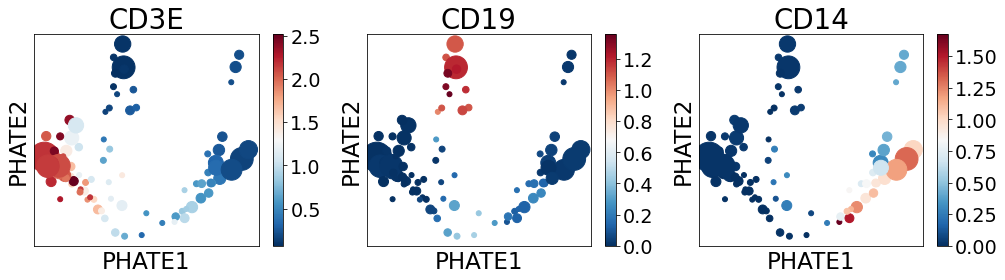

In [19]:
fig, axes = plt.subplots(1,3, figsize=(14, 4))

genes = ['CD3E', 'CD19', 'CD14']

for i, ax in enumerate(axes.flatten()):
    scprep.plot.scatter2d(coarse_embedding, s = 25*np.sqrt(coarse_sizes),
                          c=coarse_expression[genes[i]], legend_anchor=(1,1), ax=ax, title=genes[i],
                          xticks=False, yticks=False, label_prefix="PHATE", fontsize=16, cmap = 'RdBu_r')

fig.tight_layout()

## 6. Visualizing Fine Granularity

Next, multiscale PHATE allows users to 'zoom in' on populations of interest and perform finer grained analysis using the .transform() and .get_expression() functions.

Using these the .transform() function can get a little confusing. Essentially, we have select a coarse resolution of clusters (coarse_cluster_level) and then a cluster of interest to zoom in on in this resolution (coarse_cluster). Then, we can embed this population at a finer resolution (visualization_level as before) and a finer resolution of clusters (cluster_level). Again, please play around with each of these parameters to embed different clusters across granularities:

In [20]:
zoom_embedding, zoom_clusters, zoom_sizes =  mp_op.transform(visualization_level=levels[1],
                                                             cluster_level=levels[2],
                                                             coarse_cluster_level=levels[9],
                                                             coarse_cluster=8)

<AxesSubplot:xlabel='Multiscale PHATE1', ylabel='Multiscale PHATE2'>

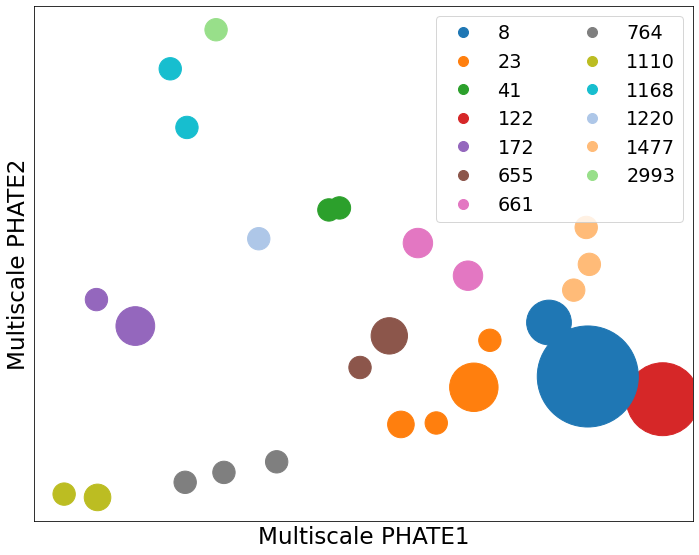

In [21]:
scprep.plot.scatter2d(zoom_embedding, s = 500*np.sqrt(zoom_sizes), c = zoom_clusters,
                      fontsize=16, ticks=False,label_prefix="Multiscale PHATE", figsize=(10,8))


Next, we can identify the identities of subpopulations of interest by mapping the expression of known markers.  This is done using the get_expression() function but, as with the .transform() function, we also have to pass coarse_cluster_level and coarse_cluster to indicate which population we intend to zoom in on.

In this case, we zoom into B cells and map the expression of key genes to identify B cell subpopulations - CD19 for Naive B cells, CD20 (gene name MS5A1) for Activated B cells and CD27 for Memory B cells:

In [22]:
fine_expression = pd.DataFrame()
fine_expression['CD19'] = mp_op.get_expression(data_sqrt['CD19 (ENSG00000177455)'].values,
                                                 visualization_level =  levels[1],
                                                 coarse_cluster_level=levels[9],
                                                 coarse_cluster=8)
fine_expression['CD27'] = mp_op.get_expression(data_sqrt['CD27 (ENSG00000139193)'].values,
                                                 visualization_level =  levels[1],
                                                 coarse_cluster_level=levels[9],
                                                 coarse_cluster=8)
fine_expression['CD20'] = mp_op.get_expression(data_sqrt['MS4A1 (ENSG00000156738)'].values,
                                                 visualization_level =  levels[1],
                                                 coarse_cluster_level=levels[9],
                                                 coarse_cluster=8)

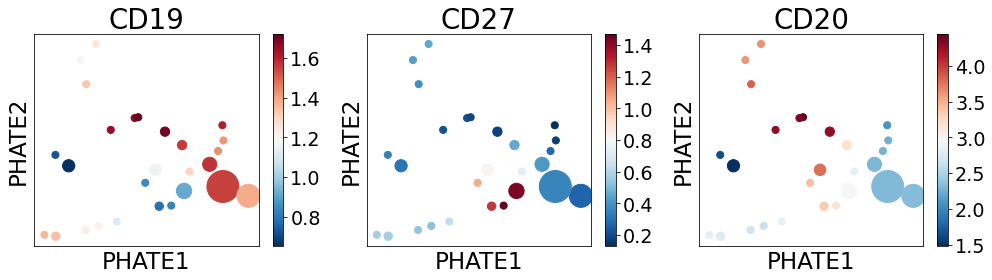

In [23]:
fig, axes = plt.subplots(1,3, figsize=(14, 4))

genes = ['CD19','CD27','CD20']

for i, ax in enumerate(axes.flatten()):
    scprep.plot.scatter2d(zoom_embedding, s = 50*np.sqrt(zoom_sizes),
                          c=fine_expression[genes[i]], legend_anchor=(1,1), ax=ax, title=genes[i],
                          xticks=False, yticks=False, label_prefix="PHATE", fontsize=16, cmap = 'RdBu_r')

fig.tight_layout()

## 7. Conclusion

Multiscale PHATE is a novel multi-resolution machine learning tool that is able to analyze big datasets across multiple granularities. With our approach we are able to construct and visualize a hierarchy of cluster similarities which we use to zoom in and out of regions of interest.